##Libraries

In [4]:
# Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

from keras_tuner import RandomSearch
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 8.9 MB/s eta 0:00:00


## Load Data

In [5]:
cifar10 = tf.keras.datasets.cifar10

(X_train_full, y_train_full), (X_test, y_test) =cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Pre-Processing

In [6]:
# Reshape the images from 32x32x3 to a 1D array with 3072 features (32*32*3)
#X_train_full = X_train_full.reshape(-1, 32 * 32 * 3)

#X_test = X_test.reshape(-1, 32 * 32 * 3)


# Convert the labels to a 1D array using the ravel() function
y_train_full = y_train_full.ravel()
y_test = y_test.ravel()

# Scale the features using min-max scaling by dividing by 255.0
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split into training and validation sets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Check shapes and types
print("No. of Training Samples: ", X_train.shape)
print("No. of Training Labels: ", y_train.shape)

print("\nNo. of Validation Samples: ", X_valid.shape)
print("No. of Validation Labels: ", y_valid.shape)

print("\nNo. of Testing Samples: ", X_test.shape)
print("No. of Testing Labels: ", y_test.shape)

print("\nX type: ", X_train.dtype)
print("y type: ", y_train.dtype)

No. of Training Samples:  (45000, 32, 32, 3)
No. of Training Labels:  (45000,)

No. of Validation Samples:  (5000, 32, 32, 3)
No. of Validation Labels:  (5000,)

No. of Testing Samples:  (10000, 32, 32, 3)
No. of Testing Labels:  (10000,)

X type:  float64
y type:  uint8


# Experiment #12 (First Trial)

**Summary**

This experiment marks the first trial of applying the MLP model to a **color image dataset** with an input size of **32×32×3**, expanding from previous grayscale 28×28 inputs. The model architecture consists of a flattened input layer followed by three fully connected hidden layers of varying sizes (**300 to 100 to 300 neurons**) using **ReLU activation** and **random_normal initialization**. To improve generalization and reduce overfitting, each hidden layer applies a **Dropout rate of 0.15**, randomly deactivating 15% of neurons during training. The final layer uses a **softmax activation** to output probabilities for 10 distinct classes.

The training process uses **stochastic gradient descent (SGD)** with a **learning rate of 0.05** and **Sparse Categorical Cross-Entropy loss**, ideal for integer-encoded class labels. **Early stopping** is employed to monitor validation loss and restore the best weights when training convergence halts. The model is trained for up to 30 epochs using mini-batches of 64 samples.

After training, the reports **training and testing accuracy**, generates a **confusion matrix** and **classification report** to analyze performance across classes, and visualizes **accuracy and loss curves** for both training and validation. This first trial aims to assess how the MLP handles more complex, multi-channel image data, testing its ability to generalize under moderate regularization and a lower learning rate.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_Multiclass_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985,310 (3.76 MB)

 Trainable params: 985,310 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.2247 - loss: 2.0873 - val_accuracy: 0.3514 - val_loss: 1.8275
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3500 - loss: 1.8147 - val_accuracy: 0.3458 - val_loss: 1.8075
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3835 - loss: 1.7296 - val_accuracy: 0.3682 - val_loss: 1.7260
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4056 - loss: 1.6641 - val_accuracy: 0.3966 - val_loss: 1.6648
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4228 - loss: 1.6228 - val_accuracy: 0.4184 - val_loss: 1.6156
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4369 - loss: 1.5823 - val_accuracy: 0.4284 - val_loss: 1.5749
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4439 - loss: 1.5533 - val_accuracy: 0.4010 - val_loss: 1.6193
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4536 - loss: 1.5251 - va

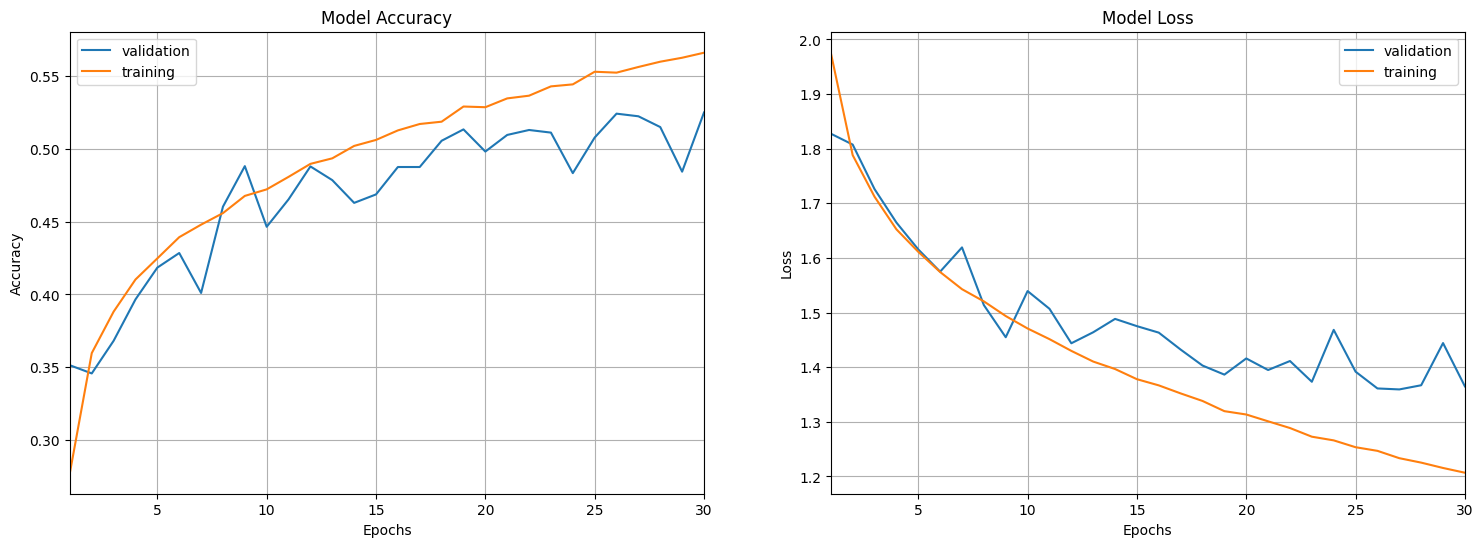

CPU times: user 6min 58s, sys: 14.9 s, total: 7min 13s
Wall time: 5min 21s


In [7]:
%%time


'''
Delete the TensorFlow graph
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration
'''
np.random.seed(100)
tf.random.set_seed(100)

'''
Set the values for the weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation_hidden = 'relu'

# Final classification layer has 10 neurons and "softmax" activation function
activation_final = 'softmax'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation_hidden,
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.15))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation_hidden,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.15))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation_hidden,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.15))
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer,
                             activation=activation_final))


# Display a detailed summary of the model: layer names and types, output shape, and the number of parameters
model.summary()

'''
Define the optimizer

'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)


'''
Define loss function
Since our labels are integer-encoded, we use SparseCategoricalCrossentropy.
'''
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)


'''
Compile the model
'''
model.compile(loss=loss_fn,
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Declare and initialize the early stopping callback function
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=10,
                                  verbose=1,
                                  mode='auto',
                                  restore_best_weights=True)

'''
Set the epochs and batch size
'''
no_of_epochs = 30
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, # Input data
                    y_train, # target data
                    batch_size=size_of_mini_batch, # Number of samples per gradient update.
                    epochs=no_of_epochs, # Number of epochs to train the model.
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb], # Early stopping callback function
                    #validation_split=0.10, # Fraction of the training data to be used as validation data. Float between 0 and 1.
                    verbose=1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
                   )

print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show()

# Experiment #12 (Second trial - Using ChatGPT)

**Summary**

This second trial try to refine the MLP architecture for color image classification on 32×32×3 inputs,to see if there could be stability improvement, learning efficiency, and generalization compared to the first trial. The model begins by flattening the image and passing it through a deeper hierarchy of fully connected layers (**512 to 256 to 128 to 64 neurons**) with **ReLU activation** and **He normal initialization**, which helps maintain proper weight scaling for ReLU networks. A **Dropout rate of 0.2** is applied after each hidden layer to prevent overfitting by randomly disabling neurons during training. The final **softmax** layer outputs probabilities for 10 classes.

Unlike the first trial that used **SGD with a fixed learning rate**, this version adopts the **Adam optimizer** with a learning rate of 0.001, providing adaptive learning capabilities that speed up convergence and improve performance on complex data. The loss function remains **Sparse Categorical Cross-Entropy**, and **early stopping** is again implemented to monitor validation loss and restore the best-performing model weights.

The model is trained for 10 epochs with a batch size of 32. After training, it reports **training and testing accuracy**, displays the **confusion matrix** and **classification report**, and plots **accuracy and loss curves** for both training and validation. This trial evaluates how the combination of **He initialization**, **Adam optimization**, and **moderate dropout** enhances model performance and convergence compared to the earlier configuration.


Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128) 

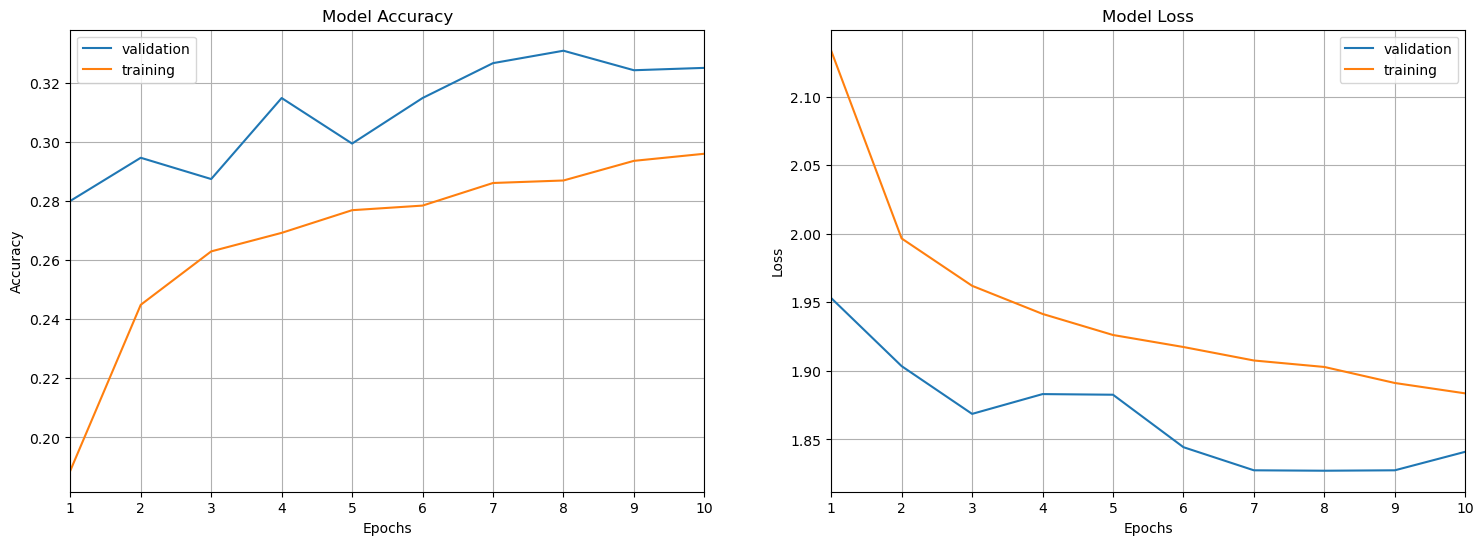

CPU times: user 15min 45s, sys: 32min 58s, total: 48min 43s
Wall time: 3min 5s


In [ ]:
%%time


'''
Delete the TensorFlow graph
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration
'''
np.random.seed(100)
tf.random.set_seed(100)

'''
Set the values for the weight initializer and activation function
'''
kernel_initializer = 'he_normal'
activation_hidden = 'relu'

# Final classification layer has 10 neurons and "softmax" activation function
activation_final = 'softmax'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(units=512, kernel_initializer=kernel_initializer, activation=activation_hidden,
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.2)) # add if needed
model.add(tf.keras.layers.Dense(units=256, kernel_initializer=kernel_initializer, activation=activation_hidden,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=128, kernel_initializer=kernel_initializer, activation=activation_hidden,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=64, kernel_initializer=kernel_initializer, activation=activation_hidden,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer,
                             activation=activation_final))


# Display a detailed summary of the model: layer names and types, output shape, and the number of parameters
model.summary()

'''
Define the optimizer

'''
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


'''
Define loss function
Since our labels are integer-encoded, we use SparseCategoricalCrossentropy.
'''
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)


'''
Compile the model
'''
model.compile(loss=loss_fn,
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Declare and initialize the early stopping callback function
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=10,
                                  verbose=1,
                                  mode='auto',
                                  restore_best_weights=True)

'''
Set the epochs and batch size
'''
no_of_epochs = 10
size_of_mini_batch = 32


'''
Train the model
'''
history = model.fit(X_train, # Input data
                    y_train, # target data
                    batch_size=size_of_mini_batch, # Number of samples per gradient update.
                    epochs=no_of_epochs, # Number of epochs to train the model.
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb], # Early stopping callback function
                    #validation_split=0.10, # Fraction of the training data to be used as validation data. Float between 0 and 1.
                    verbose=1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
                   )

print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show()

# Experiment #12 (Third trial)

**Summary**

This third trial further try to refines the MLP model architecture for 10 class color image classification on 32×32×3 inputs, emphasizing a balance between model complexity, generalization, and controlled optimization. The network flattens the input image and passes it through three fully connected hidden layers with sizes **350 to 150 to 350 neurons**, each using **ReLU activation** and **He normal initialization** to maintain gradient stability during training. To prevent overfitting, a **Dropout rate of 0.2** is applied after every hidden layer, ensuring better robustness and reducing dependence on specific neuron activations. The final output layer uses **softmax** to produce probability distributions across 10 categories.

Unlike the previous trial that used the Adam optimizer, this configuration reintroduces **stochastic gradient descent (SGD)** with a **smaller learning rate of 0.025** to enable steadier and more controlled convergence. The model employs **Sparse Categorical Cross-Entropy loss** for integer-encoded labels, and **early stopping** is applied to monitor validation loss and restore the best model weights automatically. The training runs for up to 30 epochs using a mini batch size of 64.

After training, then evaluating **train and test accuracy**, prints a **confusion matrix** and **classification report**, and visualizes **accuracy and loss curves** for both training and validation sets. This experiment investigates how adjusting the learning rate and depth, while maintaining Dropout regularization, affects convergence speed, performance stability, and generalization compared with the previous Adam-based setup.


Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 350)               1075550   
                                                                 
 dropout (Dropout)           (None, 350)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               52650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 350)               52850     
                                                                 
 dropout_2 (Dropout)         (None, 350) 

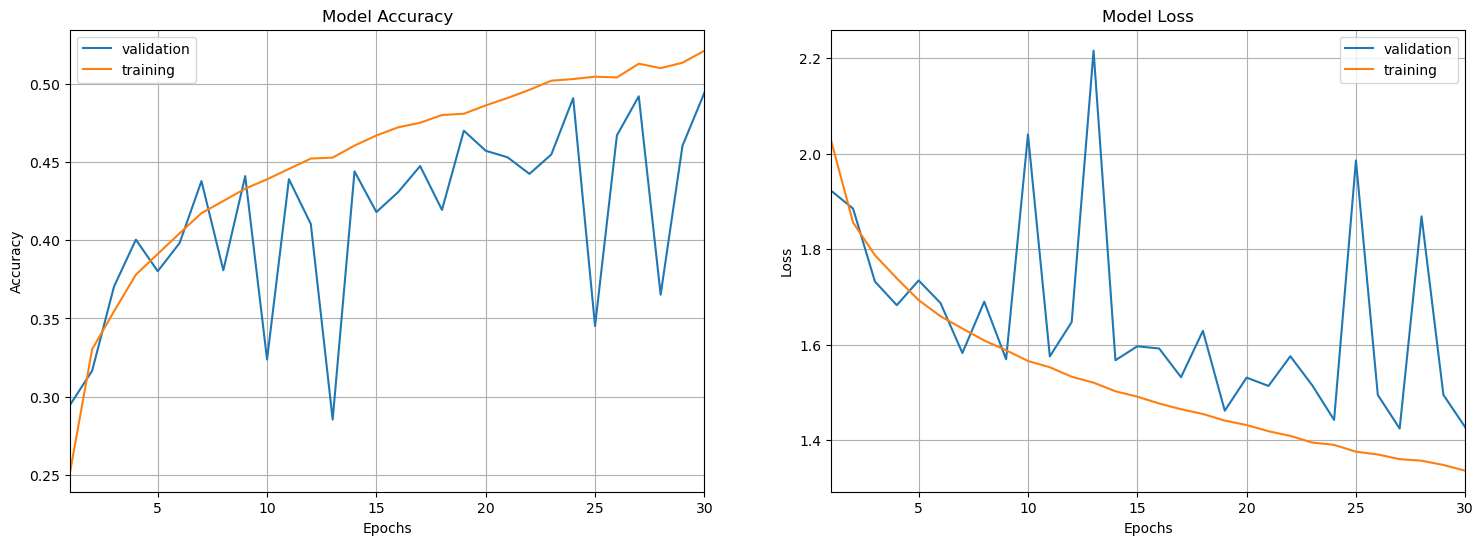

CPU times: user 14min, sys: 27min 31s, total: 41min 31s
Wall time: 2min 39s


In [ ]:
%%time

from tensorflow.keras import regularizers
'''
Delete the TensorFlow graph
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration
'''
np.random.seed(100)
tf.random.set_seed(100)

'''
Set the values for the weight initializer and activation function
'''
kernel_initializer = 'he_normal'
activation_hidden = 'relu'

# Final classification layer has 10 neurons and "softmax" activation function
activation_final = 'softmax'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially.
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
# 1st layer
model.add(tf.keras.layers.Dense(units=350, kernel_initializer=kernel_initializer, activation=activation_hidden,
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.2))
# 2nd layer
model.add(tf.keras.layers.Dense(units=150, kernel_initializer=kernel_initializer, activation=activation_hidden,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.2))
# 3nd layer
model.add(tf.keras.layers.Dense(units=350, kernel_initializer=kernel_initializer, activation=activation_hidden,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.2))
# ouput layer
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer,
                             activation=activation_final))


# Display a detailed summary of the model: layer names and types, output shape, and the number of parameters
model.summary()

'''
Define the optimizer

'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.025)



'''
Define loss function
Since our labels are integer-encoded, we use SparseCategoricalCrossentropy.
'''
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)


'''
Compile the model
'''
model.compile(loss=loss_fn,
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Declare and initialize the early stopping callback function
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=10,
                                  verbose=1,
                                  mode='auto',
                                  restore_best_weights=True)

'''
Set the epochs and batch size
'''
no_of_epochs = 30
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, # Input data
                    y_train, # target data
                    batch_size=size_of_mini_batch, # Number of samples per gradient update.
                    epochs=no_of_epochs, # Number of epochs to train the model.
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb], # Early stopping callback function
                    #validation_split=0.10, # Fraction of the training data to be used as validation data. Float between 0 and 1.
                    verbose=1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
                   )

print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show()